---
title: "Dimensionality Reduction"
date: 2023-03-15
author: "Chanseok Kang"
toc: true 
categories: [Python]
image: ./images/TSNE-mnist.png
title-block-banner: true
---

## TL;DR

Principal Component Analysis (PCA for short) is one of dimensionality reduction approaches. It can reduce dimensionality of data with low value while maintaining the important features. In this notebook, we will derive its process with simple example. Also, we will follow up another dimensionality reduction method called T-SNE (student T-distribution Stochastic Neighbor Embedding), and used it for MNIST dataset.

## Packages

In [1]:
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt

## Dataset

In this example, we will build simple 2D data.

In [2]:
num_samples = 6
num_variables = 2

X = np.empty((num_samples, num_variables))
X.shape

(6, 2)

In [3]:
X[:, 0] = [10, 11, 8, 3, 2, 1]
X[:, 1] = [6, 4, 5, 3, 4, 1]

X

array([[10.,  6.],
       [11.,  4.],
       [ 8.,  5.],
       [ 3.,  3.],
       [ 2.,  4.],
       [ 1.,  1.]])

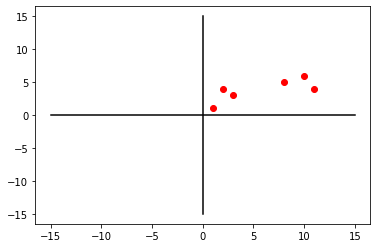

In [4]:
plt.plot(X[:, 0], X[:, 1], 'ro')

x_axis = np.linspace(-15, 15, 256)
y_axis = np.linspace(-15, 15, 256)

plt.plot(x_axis, [0 for i in range(256)], color='black')
plt.plot([0 for i in range(256)], y_axis, color='black')
plt.show()

In order to handle PCA, all data points need to be centered. To do this, we subtract data's mean to all points.

In [12]:
X_centered = X - X.mean(axis=0)

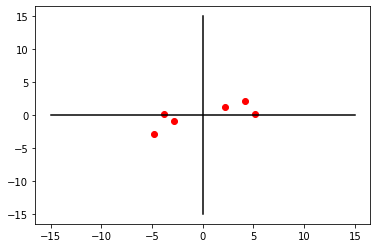

In [13]:
plt.plot(X_centered[:, 0], X_centered[:, 1], 'ro')

x_axis = np.linspace(-15, 15, 256)
y_axis = np.linspace(-15, 15, 256)

plt.plot(x_axis, [0 for i in range(256)], color='black')
plt.plot([0 for i in range(256)], y_axis, color='black')
plt.show()

## PCA using Singular Value Decomposition

At first, we can apply Singular Value Decomposition (SVD for short) for PCA. As you can see, SVD requires $U$, $\Sigma$, and $V^T$. And we derive them from numpy's svd method.

In [14]:
U, s, Vt = np.linalg.svd(X_centered)

In [15]:
X_centered

array([[ 4.16666667,  2.16666667],
       [ 5.16666667,  0.16666667],
       [ 2.16666667,  1.16666667],
       [-2.83333333, -0.83333333],
       [-3.83333333,  0.16666667],
       [-4.83333333, -2.83333333]])

In [16]:
U

array([[-0.45438817,  0.33204035, -0.30279191,  0.25107087,  0.06884814,
         0.7237548 ],
       [-0.48932622, -0.56161568,  0.03612313,  0.16710266,  0.62674286,
        -0.15202922],
       [-0.23745828,  0.18811092,  0.9395002 ,  0.03250777, -0.04314116,
         0.15049689],
       [ 0.29016107,  0.02141147,  0.05508422,  0.94555589, -0.04078069,
        -0.12874322],
       [ 0.35450988,  0.5288192 ,  0.02960519, -0.09596758,  0.76313937,
        -0.04695799],
       [ 0.53650172, -0.50876627,  0.1429714 , -0.06853934,  0.12863667,
         0.64158938]])

In [17]:
s

array([10.17664827,  2.47032319])

In [18]:
Vt

array([[-0.95415813, -0.29930295],
       [-0.29930295,  0.95415813]])

But s from `numpy.linalg.svd` is the vectors with singular value, and we cannot use it for dot product. So we need to recover its dimension for dot product.

In [19]:
S = np.zeros((6, 2))
S[:2, :2] = np.diag(s)

S

array([[10.17664827,  0.        ],
       [ 0.        ,  2.47032319],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [20]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

### Singular Value Decomposition Compressing

In this notebook, SVD is used for PCA. But usually, it can use for data compression.

In [21]:
m, n = X.shape

pruned_U = U[:m, :n]

pruned_U

array([[-0.45438817,  0.33204035],
       [-0.48932622, -0.56161568],
       [-0.23745828,  0.18811092],
       [ 0.29016107,  0.02141147],
       [ 0.35450988,  0.5288192 ],
       [ 0.53650172, -0.50876627]])

In [22]:
pruned_S = np.zeros((n, n))
pruned_S[:n, :n] = np.diag(s)

pruned_S

array([[10.17664827,  0.        ],
       [ 0.        ,  2.47032319]])

As you can see the dimension of $U$ and $\Sigma$ is reduced from original one, but after SVD, its output is same.

In [23]:
X2D = pruned_U.dot(pruned_S).dot(Vt)

X2D

array([[ 4.16666667,  2.16666667],
       [ 5.16666667,  0.16666667],
       [ 2.16666667,  1.16666667],
       [-2.83333333, -0.83333333],
       [-3.83333333,  0.16666667],
       [-4.83333333, -2.83333333]])

In [24]:
np.allclose(X_centered, X2D)

True

## Pricipal Components Analysis
Using this property, we can reduce the dimension from [6,2]*[2,1] = [6,1].

In [25]:
W1 = Vt.T[:, 0]

W1

array([-0.95415813, -0.29930295])

In [28]:
PC1 = X_centered.dot(W1)

PC1

array([-4.62414862, -4.97970085, -2.4165294 ,  2.95286717,  3.60772235,
        5.45978934])

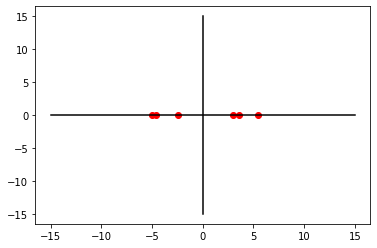

In [29]:
plt.plot(PC1, [0 for i in range(0,6)], 'ro')

plt.plot(x_axis, [0 for i in range(0,256)], color='black')
plt.plot([0 for i in range(0,256)], y_axis, color='black')
plt.show()

In [30]:
W2 = Vt.T[:, 1]
PC2 = X_centered.dot(W2)

PC2

array([ 0.82024699, -1.38737223,  0.46469476,  0.05289325,  1.30635434,
       -1.25681711])

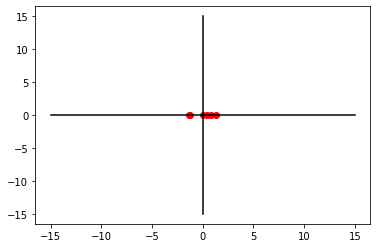

In [31]:
plt.plot(PC2, [0 for i in range(0,6)], 'ro')

plt.plot(x_axis, [0 for i in range(0,256)], color='black')
plt.plot([0 for i in range(0,256)], y_axis, color='black')
plt.show()

In [32]:
PC1_variation = np.sum(PC1**2)/(6-1)
PC2_variation = np.sum(PC2**2)/(6-1)

total = PC1_variation + PC2_variation

print("PC1 : ", round((PC1_variation/total)*100, 2), "%")
print("PC2 : ", round((PC2_variation/total)*100, 2), "%")

PC1 :  94.44 %
PC2 :  5.56 %


Through this result, We can find out that PC1 contains more information for describing this data.

## MNIST with PCA dimentionality reduction

Now, let's apply PCA into MNIST dataset. As you already know, MNIST consists of grayscale 10 digit images that has 28 x 28 shape.

### Packages

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import pandas as pd
import seaborn as sns

### Dataset

In [34]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


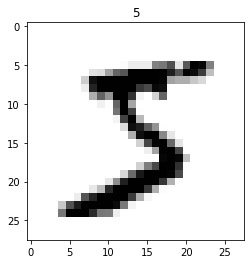

In [35]:
plt.imshow(X_train[0], cmap='binary')
plt.title(y_train[0])
plt.show()

### PCA from sklearn.decomposition

In [36]:
pca = PCA()

### Reasonable choice of dimension

Each image has 28 x 28 shape. That is 784 features to explain the image. In this case, how can we find the reasonable dimension for explain this 10 digit data? We can find it through `explained_variance_ratio_`. The lower its value, it can represent its information.

In [37]:
pca.n_components = 784

pca_data = pca.fit_transform(X_train.reshape(-1, 784))

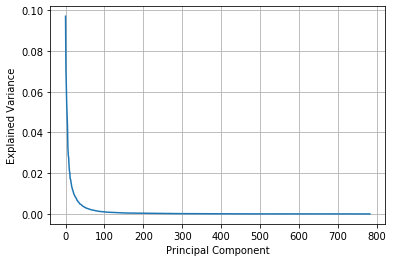

In [38]:
plt.grid()
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.show()

As you can see, the value of nearly 200 can represent its information. So we can choose the target dimension by 200.

In [39]:
pca.n_components = 200
pca_data = pca.fit_transform(X_train.reshape(-1, 784))

In [40]:
print("Original : ", X_train.reshape(-1, 784).shape)
print("After PCA : ", pca_data.shape)

Original :  (60000, 784)
After PCA :  (60000, 200)


### Visualization

We extract first 2 features and display it.

In [41]:
## Stack PC1, PC2, and labels
pca_data_label = np.vstack((pca_data[:1000, :2].T, y_train[:1000])).T

print(pca_data_label)

[[ 123.93258866 -312.67426203    5.        ]
 [1011.71837587 -294.85703827    0.        ]
 [ -51.84960805  392.17315286    4.        ]
 ...
 [ 524.40668703   14.70697414    0.        ]
 [ 255.49511737 -744.52137464    3.        ]
 [-306.59035849 -149.58107313    6.        ]]


In [42]:
pca_df = pd.DataFrame(pca_data_label, columns=['PC1', 'PC2', 'label'])

In [43]:
pca_df.head()

,PC1,PC2,label
0,123.932589,-312.674262,5.0
1,1011.718376,-294.857038,0.0
2,-51.849608,392.173153,4.0
3,-799.127037,-607.197217,1.0
4,-382.754942,730.542867,9.0


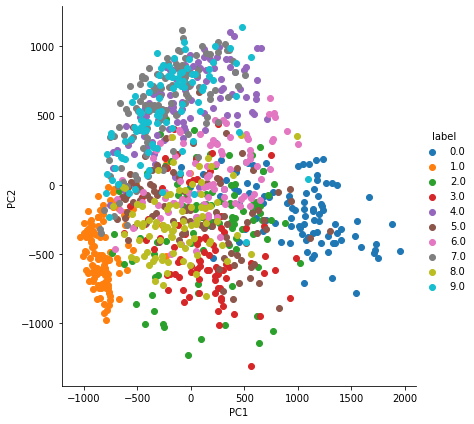

In [44]:
ax = sns.FacetGrid(pca_df, hue='label', height=6).map(plt.scatter, 'PC1', 'PC2')
ax.add_legend(label_order=sorted(ax._legend_data.keys()))
plt.show()

### PCA with normalization

Or you can use normalized data with PCA.

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train.reshape(-1, 784))

In [48]:
mu = np.mean(X_scaled)
X_scaled -= mu

In [49]:
pca_data_scaled = pca.fit_transform(X_scaled)

In [50]:
pca_data_label = np.vstack((pca_data_scaled[:1000, :2].T, y_train[:1000])).T
pca_df_scaled = pd.DataFrame(pca_data_label, columns=['PC1', 'PC2', 'label'])

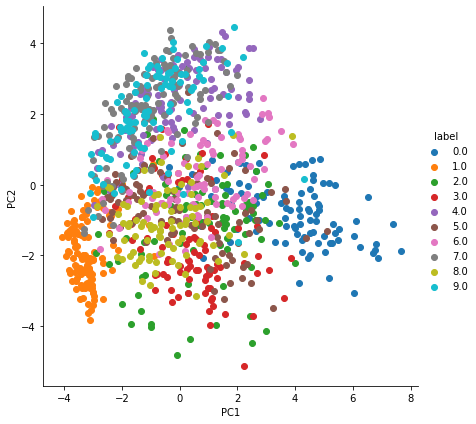

In [51]:
ax = sns.FacetGrid(pca_df_scaled, hue='label', height=6).map(plt.scatter, 'PC1', 'PC2')
ax.add_legend(label_order=sorted(ax._legend_data.keys()))
plt.show()

## T-SNE

- t-Distributed Stochastic Neighbor Embedding
  - Dimensionality reduction method
  - Especially visualization
- Developer: Geoffrey Hinton & Laurens van der Maaten
- Key idea
  - Move the data to new reduced space
  - Nearby data in the original space should be located nearby in the new space
- Idea (specifically)
  - Compute the distribution of nearby dataset in the original space
  - Compute the distribution of the dataset in the new space
  - Minimize the distance of the distributions
  
## t-SNE vs PCA
- PCA tries to find a global structure
  - Low dimensional subspace
  - Can lead to local inconsistencies
  - Far away point can become nearest neighbors
- t-SNE tries to preserve local structure
  - Low dimensional neighborhood should be the same as original neighborhood
  - Unlike PCA almost only used for visualization
  - No easy way to embed new points

In [52]:
from sklearn.manifold import TSNE

In [53]:
X_transformed = TSNE(n_components=2).fit_transform(X_scaled)

In [55]:
pca_data_label = np.vstack((X_transformed[:1000, :2].T, y_train[:1000])).T
pca_df_transformed = pd.DataFrame(pca_data_label, columns=['TSNE1', 'TSNE2', 'label'])

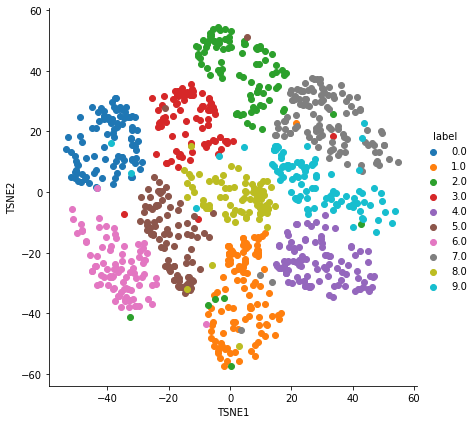

In [56]:
ax = sns.FacetGrid(pca_df_transformed, hue='label', height=6).map(plt.scatter, 'TSNE1', 'TSNE2')
ax.add_legend(label_order=sorted(ax._legend_data.keys()))
plt.show()